<a href="https://colab.research.google.com/github/RickyMacharm/Tuberculosis/blob/master/Tuberculosis_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Connect colab to your Google drive**

In [0]:
# Since we are using the fastai libraries we may as well import them from the very beginning
from fastai import *
from fastai.vision import *

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'tuberculosis/' #we choose the name 'tuberculosis' as folder name


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# **Connect colab to my Kaggle account**

In [0]:
# Run this cell and select the kaggle.json file downloaded from kaggle.com account settings page.
from google.colab import files
files.upload()

In [0]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
ls: cannot access 'kaggle.json': Transport endpoint is not connected


'-rw-r--r-- 1 root root 67 May 25 14:30 kaggle.json' shows the file is where it should be

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
cp: cannot stat 'kaggle.json': Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
kaggle.json


In [0]:
#this is from the fastai libraries
path = Path(base_dir + 'data/')

path.mkdir(parents=True, exist_ok=True)


In [0]:
# this cell should be used in any order you see fit just to check which directory you are working
!ls

gdrive	sample_data


#**Download the dataset from Kaggle.com**

This part of the code should only be ran when you are running the whole code for the first time. Once the codes have been downloaded from kaggle into your google drive, do not run this code again.

In [0]:
#I want to download the dataset into the 'data' folder created in the last cell
import os
os.chdir(path)

In [0]:
# copy the data url from kaggle and paste here
  !kaggle datasets download -d kmader/pulmonary-chest-xray-abnormalities

100% 4.08G/4.09G [01:47<00:00, 44.1MB/s]
100% 4.09G/4.09G [01:47<00:00, 40.7MB/s]


In [0]:
# from fastai we use this code just see what we have downloaded
path.ls()

[PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/__MACOSX'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/pulmonary-chest-xray-abnormalities.zip'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles')]

since we can see that it is a zip file we can now unzip the contents and also to delete the zip folder afterwards to save space on our colab

In [0]:
#unzip all files
!unzip \*.zip

Archive:  pulmonary-chest-xray-abnormalities.zip
replace ChinaSet_AllFiles.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Montgomery.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n

Archive:  ChinaSet_AllFiles.zip
   creating: ChinaSet_AllFiles/ClinicalReadings/
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0001_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0002_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0003_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0004_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0005_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0006_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0007_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0008_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0009_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0010_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR

In [0]:
path.ls()

[PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/__MACOSX'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/pulmonary-chest-xray-abnormalities.zip'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles')]

In [0]:
#Delete archive
!rm '/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles.zip'
!rm '/content/gdrive/My Drive/tuberculosis/data/Montgomery.zip'

path.ls()

rm: cannot remove '/content/gdrive/My Drive/tuberculosis/data/__MACOSX': Is a directory


[PosixPath('/content/gdrive/My Drive/tuberculosis/data/pulmonary-chest-xray-abnormalities.zip'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/__MACOSX')]

In [0]:
(path/'MontgomerySet/CXR_png').ls()

[PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet/CXR_png/MCUCXR_0001_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet/CXR_png/MCUCXR_0002_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet/CXR_png/MCUCXR_0003_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet/CXR_png/MCUCXR_0004_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet/CXR_png/MCUCXR_0005_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet/CXR_png/MCUCXR_0006_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet/CXR_png/MCUCXR_0008_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet/CXR_png/MCUCXR_0011_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet/CXR_png/MCUCXR_0013_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet/CXR_png/MCUCXR_0015_0.png'),
 PosixPath('/content

In [0]:
(path/'ChinaSet_AllFiles/CXR_png').ls()


[PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles/CXR_png/CHNCXR_0004_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles/CXR_png/CHNCXR_0005_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles/CXR_png/CHNCXR_0006_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles/CXR_png/CHNCXR_0328_1.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles/CXR_png/CHNCXR_0007_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles/CXR_png/CHNCXR_0008_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles/CXR_png/CHNCXR_0009_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles/CXR_png/CHNCXR_0329_1.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles/CXR_png/CHNCXR_0330_1.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles/CXR_png/C

All we have have done in the last few cells is just to locate where our images are stored. We can see two folders

# **CREATE ONE FOLDER FOR ALL THE IMAGES**

The next line of code is to check how many images are in both folders

In [0]:
con_1 = (path/'MontgomerySet/CXR_png').ls()
con_2 = (path/'ChinaSet_AllFiles/CXR_png').ls()
print(len(con_1)); print(len(con_2)); 
len(con_1) + len(con_2)

139
663


802

we are going to create a folder for the datasets. We will call the new folder *'nu_folder'*

In [0]:
nu_folder = os.path.join(path, 'nu_folder')
os.mkdir(nu_folder)

In [0]:
path.ls()

[PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/__MACOSX'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/pulmonary-chest-xray-abnormalities.zip'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/nu_folder')]

Having verified that our new folder has been successfully created, we are now going to move the contents of the two folders ('MontgomerySet/CXR_png' and 'ChinaSet_AllFiles/CXR_png') into the folder 'nu_folder'

In [0]:
#To change the directory from where the files to look // ***Source Directory***
os.chdir(path/'MontgomerySet/CXR_png')

#To get the list of files in the specific source directory
myFiles = os.listdir()

#To move all the '.png' files to a different location // ***Destination Directory***
for filename in myFiles:
    if filename.endswith('.png'):
        print('Moving the file : ' + filename)
        shutil.move(filename, path/'nu_folder') #Destination directory name


print('All the files are moved as directed. Thanks')

Moving the file : MCUCXR_0001_0.png
Moving the file : MCUCXR_0002_0.png
Moving the file : MCUCXR_0003_0.png
Moving the file : MCUCXR_0004_0.png
Moving the file : MCUCXR_0005_0.png
Moving the file : MCUCXR_0006_0.png
Moving the file : MCUCXR_0008_0.png
Moving the file : MCUCXR_0011_0.png
Moving the file : MCUCXR_0013_0.png
Moving the file : MCUCXR_0015_0.png
Moving the file : MCUCXR_0016_0.png
Moving the file : MCUCXR_0017_0.png
Moving the file : MCUCXR_0019_0.png
Moving the file : MCUCXR_0020_0.png
Moving the file : MCUCXR_0021_0.png
Moving the file : MCUCXR_0022_0.png
Moving the file : MCUCXR_0023_0.png
Moving the file : MCUCXR_0024_0.png
Moving the file : MCUCXR_0026_0.png
Moving the file : MCUCXR_0027_0.png
Moving the file : MCUCXR_0028_0.png
Moving the file : MCUCXR_0029_0.png
Moving the file : MCUCXR_0030_0.png
Moving the file : MCUCXR_0031_0.png
Moving the file : MCUCXR_0035_0.png
Moving the file : MCUCXR_0038_0.png
Moving the file : MCUCXR_0040_0.png
Moving the file : MCUCXR_004

In [0]:

#To change the directory from where the files to look // ***Source Directory***
os.chdir(path/'ChinaSet_AllFiles/CXR_png')

#To get the list of files in the specific source directory
myFiles = os.listdir()

#To move all the '.png' files to a different location // ***Destination Directory***
for filename in myFiles:
    if filename.endswith('.png'):
        print('Moving the file : ' + filename)
        shutil.move(filename, path/'nu_folder') #Destination directory name


print('All the files are moved as directed. Thanks')

Moving the file : CHNCXR_0004_0.png
Moving the file : CHNCXR_0005_0.png
Moving the file : CHNCXR_0006_0.png
Moving the file : CHNCXR_0328_1.png
Moving the file : CHNCXR_0007_0.png
Moving the file : CHNCXR_0008_0.png
Moving the file : CHNCXR_0009_0.png
Moving the file : CHNCXR_0329_1.png
Moving the file : CHNCXR_0330_1.png
Moving the file : CHNCXR_0331_1.png
Moving the file : CHNCXR_0332_1.png
Moving the file : CHNCXR_0010_0.png
Moving the file : CHNCXR_0012_0.png
Moving the file : CHNCXR_0333_1.png
Moving the file : CHNCXR_0013_0.png
Moving the file : CHNCXR_0334_1.png
Moving the file : CHNCXR_0335_1.png
Moving the file : CHNCXR_0336_1.png
Moving the file : CHNCXR_0014_0.png
Moving the file : CHNCXR_0015_0.png
Moving the file : CHNCXR_0337_1.png
Moving the file : CHNCXR_0338_1.png
Moving the file : CHNCXR_0016_0.png
Moving the file : CHNCXR_0017_0.png
Moving the file : CHNCXR_0339_1.png
Moving the file : CHNCXR_0018_0.png
Moving the file : CHNCXR_0019_0.png
Moving the file : CHNCXR_002

In [0]:
len((path/'nu_folder').ls())

801

You do not need to run the last few files again if not you will have duplicated files which will caus problems with the labelling going forward.

From the last cell we can see that we have actually moved all the files we require.



# **Let us pre process the data for labelling**

In [0]:
fnames = get_image_files(path/'nu_folder')
fnames[:5]

[PosixPath('/content/gdrive/My Drive/tuberculosis/data/nu_folder/CHNCXR_0004_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/nu_folder/CHNCXR_0005_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/nu_folder/CHNCXR_0006_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/nu_folder/CHNCXR_0328_1.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/nu_folder/CHNCXR_0007_0.png')]

The last only showed us the contents of the new folder after we gave the a new variable name 'fnames' by Using the **fastai** function *'get_image_files'*

The next cell is going to use the popular tool regex or Regular Expression, to extract the labelling from the image name. As always, **fastai** has got us covered.

Here is the regular expression that extract the label for this dataset.

In [0]:
np.random.seed(3)
pat = r'_(\d{1}).png$'

In fastai the data-containing object that we need to feed to a neural network is called a DataBunch. This is called a ‘bunch’ because it bunches together several PyTorch classes into one. 

In [0]:
data = ImageDataBunch.from_name_re(path/'nu_folder', fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)



ImageDataBunch;

Train: LabelList (640 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,0,1,0
Path: /content/gdrive/My Drive/tuberculosis/data/nu_folder;

Valid: LabelList (160 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,1,0,0,1
Path: /content/gdrive/My Drive/tuberculosis/data/nu_folder;

Test: None

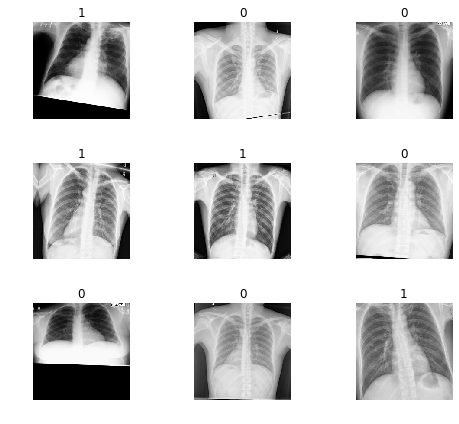

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
print(data.classes)
len(data.classes),data.c

['0', '1']


(2, 2)

In [0]:
re_labels = {0:'normal', 1:'tuberculosis'}

# **TRAINING**

 To create a learner for a convolutional neural network, you just have to tell it two things:
 
**1. data:**  What's your data? It takes a data bunch.
 
 **2. arch:** What's your architecture. 
 
 There are lots of different ways of constructing a convolutional neural network. We will use a particular kind of model called ResNet which works extremely well nearly all the time.
 
 
### **ResNet34**

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 24074344.75it/s]


**Transfer Learning:** This how we take a model that already knows how to do something pretty well and make it so that it can do our thing really well. The **resnet34** is a pre-trained model , and then we fit it. By doing this, we can train models in 1/100 or less of the of regular model training with 1/100 or less of the data of regular model training. Potentially, many  thousands of times less.

We will use the new [fit_one_cycle](https://arxiv.org/pdf/1803.09820.pdf) method introduced in 2018.

But first we will find the best Learning Rate for this first stage.

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


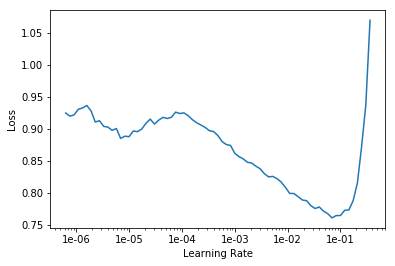

In [0]:
learn.recorder.plot()

We will choose the learning rate we got out from the celss above and also we'd choose 5 epochs

In [0]:
lr = 0.001

In [0]:
learn.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.857350,0.759980,0.562500,04:13
1,0.771910,0.993845,0.568750,03:06
2,0.685776,0.766045,0.637500,03:05
3,0.648490,0.588387,0.756250,03:08
4,0.606825,0.513496,0.793750,03:11


In [0]:
learn.save('Tuber_Resnet34-001')

After running the fit function and seeing the result of the accuracy, we will now unfreeze some of the layers and train some more to see if we get a better accuracy

In [0]:
learn.load('Tuber_Resnet34-001')

Learner(data=ImageDataBunch;

Train: LabelList (640 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,0,1,0
Path: /content/gdrive/My Drive/tuberculosis/data/nu_folder;

Valid: LabelList (160 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,1,0,0,1
Path: /content/gdrive/My Drive/tuberculosis/data/nu_folder;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, 

In [0]:
learn.unfreeze()

We have to find a better learning Rate now that we have unfreezed the rest of the layers

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07


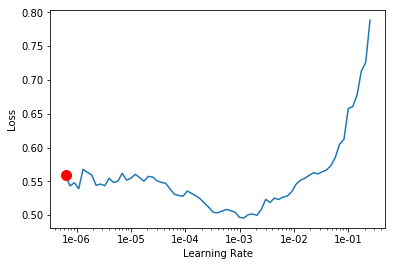

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(8, max_lr=slice(1.5e-03, lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.565863,0.646972,0.693750,03:08
1,0.583833,0.625355,0.712500,03:11
2,0.581866,0.746210,0.706250,03:12
3,0.576701,0.565878,0.712500,03:11
4,0.570028,0.796089,0.725000,03:12
5,0.535242,0.759011,0.743750,03:13
6,0.499672,0.380642,0.825000,03:13
7,0.462944,0.353334,0.837500,03:15


In [0]:
learn.save('Tuber_Resnet34-002')

In [0]:
learn.fit_one_cycle(5, max_lr=slice(3e-04, lr/10))

epoch,train_loss,valid_loss,accuracy,time
0,0.181970,0.383075,0.862500,03:12
1,0.207223,0.574922,0.800000,03:13
2,0.214277,0.718599,0.781250,03:15
3,0.214962,0.360573,0.875000,03:13
4,0.206168,0.328878,0.875000,03:17


In [0]:
learn.save('Tuber_Resnet34-003')

### ResNet50

We now try another version of the Resnet architecture.

We will pretty much repeat what we did with ResNet34 for the ResNet50.

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:04<00:00, 21948461.70it/s]


In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
